# EXAMPLE USE OF THE ML_EDM PACKAGE

## Inititalisation

Imports

In [1]:
from classification import ChronologicalClassifiers, EarlyClassifier
from trigger_models import EconomyGamma

import numpy as np
from sktime import datasets
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier

Data preparation

In [2]:
train_x, train_y = datasets.load_from_tsfile("../datasets/Univariate_ts/ItalyPowerDemand/ItalyPowerDemand_TRAIN.ts")
test_x, test_y = datasets.load_from_tsfile("../datasets/Univariate_ts/ItalyPowerDemand/ItalyPowerDemand_TEST.ts")
train_x = np.vstack(train_x["dim_0"].apply(lambda x: x.values))
test_x = np.vstack(test_x["dim_0"].apply(lambda x: x.values))
combined_x, combined_y = np.concatenate((train_x, test_x)), np.concatenate((train_y, test_y))
test_index = int(.5*len(combined_x))
train_x, train_y = combined_x[:test_index], combined_y[:test_index]
test_x, test_y = combined_x[test_index:], combined_y[test_index:]

print(train_x.shape)
print(test_x.shape)

(548, 24)
(548, 24)


## Early Prediction using classification.EarlyClassifier 

Parameters initalization

In [3]:
misclassification_cost = [[0, 10],
                          [10, 0]]

def delay_cost(series_length):
    return series_length * .1

Instanciation

In [4]:
ec = EarlyClassifier(misclassification_cost, delay_cost, feature_extraction=False)

Model Fitting

In [5]:
ec.fit(train_x, train_y)

Using 'nb_classifiers=20 by default.


get_params

In [6]:
ec.get_params()

{'classifiers': [HistGradientBoostingClassifier(),
  HistGradientBoostingClassifier(),
  HistGradientBoostingClassifier(),
  HistGradientBoostingClassifier(),
  HistGradientBoostingClassifier(),
  HistGradientBoostingClassifier(),
  HistGradientBoostingClassifier(),
  HistGradientBoostingClassifier(),
  HistGradientBoostingClassifier(),
  HistGradientBoostingClassifier(),
  HistGradientBoostingClassifier(),
  HistGradientBoostingClassifier(),
  HistGradientBoostingClassifier(),
  HistGradientBoostingClassifier(),
  HistGradientBoostingClassifier(),
  HistGradientBoostingClassifier(),
  HistGradientBoostingClassifier(),
  HistGradientBoostingClassifier(),
  HistGradientBoostingClassifier(),
  HistGradientBoostingClassifier()],
 'models_series_lengths': array([ 1,  2,  3,  4,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 18, 19, 20,
        21, 22, 24]),
 'base_classifier': HistGradientBoostingClassifier(),
 'nb_classifiers': 20,
 'learned_timestamps_ratio': None,
 'misclassification_cost': ar

Assess the information gain

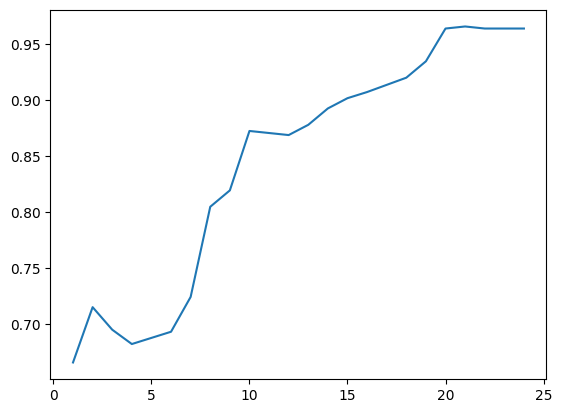

In [7]:
classes = [ec.predict(test_x[:, :length])[0] for length in ec.chronological_classifiers.models_series_lengths]
scores = [np.count_nonzero(model_classes==test_y)/test_y.shape[0] for model_classes in classes]
plt.plot(ec.chronological_classifiers.models_series_lengths, scores)

Predict on time series of random sizes

In [8]:
test_x_with_random_lengths = [ts[:np.random.randint(1, ec.chronological_classifiers.max_series_length+1)] for ts in test_x]
classes, probas, triggers, costs = ec.predict(test_x_with_random_lengths)

C:\Users\gjfh9393\Desktop\ml_edm library\code\classification.py:287: UserWarning: Some time series were truncated during prediction since no classifier was fitted for their lengths.
  warn("Some time series were truncated during prediction since no classifier was fitted for their lengths.")
C:\Users\gjfh9393\Desktop\ml_edm library\code\classification.py:341: UserWarning: Some time series were truncated during prediction since no classifier was fitted for their lengths.
  warn("Some time series were truncated during prediction since no classifier was fitted for their lengths.")
C:\Users\gjfh9393\Desktop\ml_edm library\code\trigger_models.py:251: UserWarning: Some predictions lengths were unknown to the trigger model. Last known length was assumed
  warn("Some predictions lengths were unknown to the trigger model. Last known length was assumed")
C:\Users\gjfh9393\Desktop\ml_edm library\code\trigger_models.py:255: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences

Checking predicted classes for predictions

In [9]:
classes

array(['1', '2', '1', '1', '2', '1', '1', '2', '2', '2', '1', '2', '2',
       '2', '1', '2', '2', '2', '1', '1', '2', '2', '1', '2', '1', '2',
       '1', '1', '1', '1', '1', '1', '2', '1', '2', '2', '2', '2', '1',
       '1', '2', '1', '1', '1', '2', '1', '1', '1', '1', '1', '2', '1',
       '1', '2', '1', '2', '1', '2', '2', '2', '1', '2', '2', '2', '2',
       '2', '2', '1', '1', '2', '1', '1', '1', '2', '1', '1', '1', '1',
       '2', '2', '2', '2', '2', '1', '2', '2', '1', '1', '2', '2', '1',
       '2', '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '1',
       '2', '1', '2', '2', '1', '1', '1', '2', '2', '2', '2', '1', '1',
       '2', '1', '2', '1', '2', '2', '1', '2', '2', '2', '2', '1', '1',
       '1', '2', '1', '1', '1', '1', '2', '1', '2', '2', '1', '2', '2',
       '1', '1', '2', '1', '2', '1', '1', '2', '2', '2', '2', '2', '1',
       '2', '2', '1', '2', '1', '2', '2', '1', '1', '2', '1', '2', '1',
       '1', '1', '2', '2', '2', '2', '1', '1', '1', '2', '2', '1

Checking triggers for predictions

In [10]:
triggers

array([ True,  True, False,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True, False,  True, False,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True, False,
        True,  True, False, False, False, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False, False,
       False,  True,  True,  True, False, False,  True, False,  True,
       False,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True, False, False, False, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True, False,  True,  True, False,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,

Checking estimated future costs for predictions

In [11]:
costs

array([array([2.1       , 2.2       , 2.41616162]),
       array([1.        , 1.46156628, 2.01761952, 2.0251565 , 2.0213995 ,
              2.01530157, 2.14550043, 2.26519255, 2.18233905, 2.31319898,
              2.41803662, 2.62014854])                                   ,
       array([2.62222222, 2.99107121, 3.23880519, 2.12026108, 2.08202205,
              2.05260274, 2.10245298, 2.41185029, 2.32763587, 2.34861091,
              2.15255726, 2.24290571, 2.33629663, 2.21146031, 2.32338654,
              2.42478481, 2.62507469])                                   ,
       array([1.8       , 1.94713805, 2.06602047, 2.22219644, 2.33822677,
              2.54986649])                                               ,
       array([1.9       , 2.04040404, 2.19807163, 2.31652825, 2.53060164]),
       array([1.9       , 2.04040404, 2.19807163, 2.31652825, 2.53060164]),
       array([1.6       , 1.81346801, 1.97499008, 2.07850071, 2.23332252,
              2.34816447, 2.55867045])               

Checking estimated trigger times for predictions

In [12]:
np.array([np.argmin(series_expected_costs) for series_expected_costs in costs])

array([ 0,  0,  5,  0,  0,  0,  0,  0,  8,  9,  7,  0,  0,  0,  0,  7,  0,
        2,  0,  6,  0, 10,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,
        7,  1,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0,
        7,  0, 10,  0,  0,  2,  6,  3,  5,  0,  0,  0,  0,  0,  0,  8,  0,
        0,  0,  8,  1,  6,  0,  0,  0,  1,  5,  0,  6,  0,  7,  0,  0,  0,
        0,  6,  0, 11,  0,  0,  0,  0,  1,  7,  6,  7,  0,  0,  5,  0,  0,
        0,  0,  0,  0,  0,  3,  7,  0,  0,  7,  0,  0,  2,  0,  0,  1,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  7,  0,  0,
        7,  0,  0,  0,  0,  2,  0,  0,  0,  9,  7,  0,  0,  0, 10,  5,  0,
        0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,
        5,  2, 11,  0,  0,  7,  6,  0,  0,  0,  2,  0,  0,  0,  0,  0,  2,
        7,  5,  0,  0,  1,  0,  0,  0,  0,  5,  3,  0,  9,  5,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  2,  0, 10,  0,  0,  0,  6,  0,  0,
        9,  5,  1,  2,  0

## Early prediction using the classifiers and the trigger model separately

Initialize classifiers

In [13]:
cc = ChronologicalClassifiers(learned_timestamps_ratio=.5, base_classifier=RandomForestClassifier(), feature_extraction=False)

Fit classifiers

In [14]:
validation_index = int(0.5 * len(train_x))
cc.fit(train_x[:validation_index], train_y[:validation_index])

get_params classifiers

In [15]:
cc.get_params()

{'classifiers': [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 'models_series_lengths': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24]),
 'base_classifier': RandomForestClassifier(),
 'nb_classifiers': 12,
 'learned_timestamps_ratio': 0.5,
 'feature_extraction': False,
 'class_prior': array([0.47810219, 0.52189781]),
 'max_series_length': 24,
 'classes_': array(['1', '2'], dtype='<U1')}

Assess the information gain

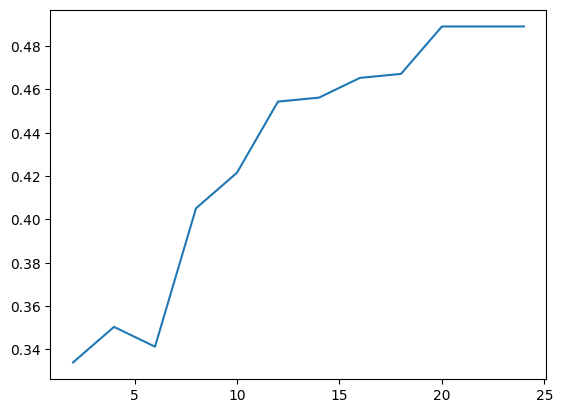

In [16]:
classes = [cc.predict(train_x[validation_index:, :length]) for length in cc.models_series_lengths]
scores = [np.count_nonzero(model_classes==train_y[validation_index:])/test_y.shape[0] for model_classes in classes]
plt.plot(cc.models_series_lengths, scores)

Get classes predictions probabilities for time series of all lengths

In [17]:
class_probabilities = np.array([cc.predict_proba(train_x[validation_index:,:length]) for length in cc.models_series_lengths])
class_probabilities = np.transpose(class_probabilities, (1,0,2))
print(class_probabilities[0])
print(class_probabilities.shape)

[[1.   0.  ]
 [0.75 0.25]
 [0.81 0.19]
 [0.83 0.17]
 [0.9  0.1 ]
 [0.94 0.06]
 [0.98 0.02]
 [0.98 0.02]
 [0.97 0.03]
 [0.98 0.02]
 [1.   0.  ]
 [1.   0.  ]]
(274, 12, 2)


Initialize Trigger Model costs

In [18]:
misclassification_cost = [[0, 10],
                          [10, 0]]

def delay_cost(series_length):
    return series_length * .1

Instantiate trigger model

In [19]:
tm = EconomyGamma(misclassification_cost,
                  delay_cost,
                  cc.models_series_lengths,
                  nb_intervals=3, 
                  aggregation_function='gini')

Fit trigger model to class probabilities

In [20]:
tm.fit(class_probabilities, train_y[validation_index:], classes_=cc.classes_)

get_params trigger model

In [21]:
tm.get_params()

{'misclassification_cost': array([[ 0, 10],
        [10,  0]]),
 'delay_cost': <function __main__.delay_cost(series_length)>,
 'models_series_lengths': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24]),
 'nb_intervals': 3,
 'aggregation_function': <function trigger_models.gini(probas)>,
 'thresholds': array([[0.36, 0.8 ],
        [0.31, 0.77],
        [0.35, 0.75],
        [0.36, 0.8 ],
        [0.37, 0.85],
        [0.25, 0.9 ],
        [0.2 , 0.93],
        [0.13, 0.92],
        [0.15, 0.93],
        [0.06, 0.96],
        [0.05, 0.96],
        [0.05, 0.97]]),
 'transition_matrices': array([[[0.85714286, 0.14285714, 0.        ],
         [0.13483146, 0.5505618 , 0.31460674],
         [0.        , 0.31914894, 0.68085106]],
 
        [[0.86666667, 0.13333333, 0.        ],
         [0.10869565, 0.7173913 , 0.17391304],
         [0.        , 0.15217391, 0.84782609]],
 
        [[0.69318182, 0.26136364, 0.04545455],
         [0.29347826, 0.58695652, 0.11956522],
         [0.0212766 ,

Predict on series of random lengths

In [22]:
test_x_with_random_lengths = [ts[:np.random.randint(1, cc.max_series_length+1)] for ts in test_x]
actual_lengths = [len(ts) for ts in test_x_with_random_lengths]

probas = cc.predict_proba(test_x_with_random_lengths)
triggers, costs = tm.predict(probas, actual_lengths)

C:\Users\gjfh9393\Desktop\ml_edm library\code\classification.py:341: UserWarning: Some time series were truncated during prediction since no classifier was fitted for their lengths.
  warn("Some time series were truncated during prediction since no classifier was fitted for their lengths.")
C:\Users\gjfh9393\Desktop\ml_edm library\code\classification.py:343: UserWarning: Some time series could not be predicted since their length was below that of the training timestamps of the first fitted classifier.
  warn("Some time series could not be predicted since their length was below that of the training timestamps "
C:\Users\gjfh9393\Desktop\ml_edm library\code\trigger_models.py:251: UserWarning: Some predictions lengths were unknown to the trigger model. Last known length was assumed
  warn("Some predictions lengths were unknown to the trigger model. Last known length was assumed")
C:\Users\gjfh9393\Desktop\ml_edm library\code\trigger_models.py:253: UserWarning: Some predictions lengths whe

Check predicted class probabilities

In [23]:
probas

array([[0.94, 0.06],
       [0.17, 0.83],
       [0.99, 0.01],
       ...,
       [0.7 , 0.3 ],
       [0.  , 1.  ],
       [0.16, 0.84]])

Check triggers

In [24]:
triggers

array([ True, False,  True, False,  True,  True,  True,  True,  True,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False,  True,  True, False,  True,  True,  True,
       False,  True,  True, False,  True,  True, False, False,  True,
        True,  True, False,  True, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False,  True,
        True, False, False, False,  True,  True,  True, False, False,
        True, False,  True,  True,  True, False, False, False,  True,
       False,  True,  True,  True, False,  True,  True, False,  True,
       False,  True,  True, False, False, False, False, False,  True,
       False,  True,  True, False, False,  True,  True, False, False,
        True, False, False,  True,  True, False,  True, False,  True,
        True,  True, False,  True, False,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,

Check estimated trigger times

In [25]:
np.array([np.argmin(series_expected_costs) for series_expected_costs in costs])

array([0, 2, 0, 5, 0, 0, 0, 0, 0, 6, 6, 6, 2, 0, 0, 5, 5, 4, 0, 4, 4, 0,
       0, 4, 0, 0, 0, 4, 0, 0, 5, 0, 0, 3, 3, 0, 0, 0, 5, 0, 5, 2, 4, 6,
       0, 2, 5, 0, 5, 5, 1, 1, 4, 0, 0, 1, 3, 6, 0, 0, 0, 4, 3, 0, 4, 0,
       0, 0, 3, 5, 4, 0, 6, 0, 0, 0, 4, 0, 0, 4, 0, 3, 0, 0, 4, 5, 4, 6,
       6, 0, 5, 0, 0, 5, 2, 0, 0, 6, 1, 0, 3, 4, 0, 0, 2, 0, 1, 0, 0, 0,
       1, 0, 5, 0, 0, 7, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 6, 0, 0, 6, 0,
       0, 0, 3, 4, 5, 0, 6, 5, 7, 0, 3, 4, 3, 0, 0, 1, 5, 2, 5, 6, 5, 0,
       0, 5, 5, 7, 0, 0, 0, 0, 0, 4, 4, 1, 7, 0, 0, 4, 1, 0, 0, 4, 0, 7,
       0, 0, 5, 5, 0, 5, 2, 4, 4, 0, 0, 0, 2, 7, 0, 0, 4, 0, 0, 0, 0, 6,
       6, 0, 1, 0, 7, 0, 5, 7, 0, 5, 6, 0, 0, 4, 0, 0, 3, 1, 0, 5, 4, 3,
       0, 0, 0, 0, 2, 0, 0, 0, 4, 6, 5, 0, 0, 4, 0, 0, 4, 0, 0, 0, 6, 0,
       5, 5, 3, 4, 0, 4, 6, 0, 1, 7, 0, 0, 0, 0, 0, 5, 0, 0, 3, 5, 0, 0,
       0, 3, 0, 5, 3, 0, 0, 4, 0, 0, 0, 5, 5, 2, 6, 0, 0, 4, 5, 4, 7, 2,
       0, 0, 0, 3, 5, 0, 4, 5, 7, 0, 0, 4, 3, 1, 6,